In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных
%matplotlib inline

from sklearn import tree
from sklearn import ensemble

In [2]:
fred_df = pd.read_csv('data/combined_data.csv', sep=',')

In [3]:
fred_df_c = fred_df.copy()

In [4]:
fred_df_c.head(3)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...


In [5]:
# Преобразование колонки text в список
fred_df_c['text'] = fred_df_c['text'].apply(lambda x: x.split(' '))

In [6]:
# Разделим DF на спам и не спам
spam_df_c = fred_df_c[fred_df_c['label'] == 1]
no_spam_df_c = fred_df_c[fred_df_c['label'] == 0] 

In [7]:
# Создание списка с уникальными словами в тексте спам письма
uniq_spam = []
uniq_spam.append([x for x in spam_df_c['text'] if x not in uniq_spam])

uniq_spam_1 = []
uniq_spam_1 = uniq_spam[0][1]

for x in uniq_spam[0][0]:
    if x not in uniq_spam_1:
        uniq_spam_1.append(x)
        
# Создание списка с уникальными словами в тексте не спам письма
uniq_no_spam = []
uniq_no_spam.append([x for x in no_spam_df_c['text'] if x not in uniq_no_spam])

uniq_no_spam_1 = uniq_no_spam[0][0][1:]
uniq_no_spam = uniq_no_spam_1[:-1]

In [8]:
# Проверка на не повторяемость слов в списках спам и не спам
only_spam = []
only_spam.append([x for x in uniq_spam_1 if x not in uniq_no_spam])
only_spam = only_spam[0]

only_no_spam = []
only_no_spam.append([x for x in uniq_no_spam if x not in uniq_spam_1])
only_no_spam = only_no_spam[0]

In [9]:
# Количество уникальных слов в письмах обозначенных как не спам
len(only_no_spam)

266

In [10]:
# Количество уникальных слов в письмах обозначенных как спам
len(only_spam)

76

In [11]:
# Разделим DF на спам и не спам
spam_df = fred_df_c[fred_df_c['label'] == 1]
no_spam_df = fred_df_c[fred_df_c['label'] == 0] 


In [12]:
# Создание словаря с частотной повторяемостью слов в тексте письма со спамом
uniq_spam_lib = {}
for x in only_spam:
    c = 0
    for y in spam_df['text']:
        if x in y:
            c += 1

    uniq_spam_lib[x] = c

In [13]:
# Создание словаря с частотной повторяемостью слов в тексте письма
uniq_no_spam_lib = {}
for x in only_no_spam:
    c = 0
    for y in no_spam_df['text']:
        if x in y:
            c += 1

    uniq_no_spam_lib[x] = c

In [39]:
uniq_no_spam_lib

{'computer': 1008,
 'connection': 755,
 'from': 17373,
 'cnn': 1119,
 'com': 9474,
 'wednesday': 2487,
 'may': 9225,
 'pm': 4825,
 'edt': 765,
 'in': 26893,
 'this': 23899,
 'report': 2476,
 'next': 3681,
 'generation': 641,
 'toys': 54,
 'read': 9199,
 'brain': 156,
 'waves': 56,
 'google': 677,
 'expands': 71,
 'personalization': 4,
 'youtube': 150,
 'wins': 305,
 'webby': 19,
 'old': 1699,
 'fashioned': 42,
 'rabbit': 12,
 'ears': 49,
 'laptop': 1093,
 'review': 2246,
 'startup': 188,
 'company': 3013,
 'aims': 94,
 'add': 3261,
 'realistic': 91,
 'elements': 485,
 'video': 1355,
 'games': 460,
 'by': 15025,
 'using': 6231,
 'wave': 144,
 'reading': 966,
 'technology': 1126,
 'help': 12664,
 'game': 548,
 'developers': 433,
 'make': 6317,
 'gaming': 49,
 'www': 11412,
 'tech': 789,
 'fun': 593,
 'mind': 809,
 'index': 1621,
 'html': 8485,
 'stepping': 78,
 'up': 8132,
 'efforts': 727,
 'allow': 1429,
 'its': 4327,
 'users': 1585,
 'personalize': 5,
 'they': 6474,
 'search': 1356,
 '

In [37]:
uniq_spam_lib

{'wulvob': 1,
 'get': 7851,
 'medircations': 5,
 'qnb': 1,
 'ikud': 1,
 'viagra': 1974,
 'levitra': 892,
 'cialis': 1540,
 'imitrex': 10,
 'flonax': 5,
 'ultram': 117,
 'vioxx': 71,
 'ambien': 74,
 'valium': 244,
 'xannax': 8,
 'soma': 328,
 'meridia': 91,
 'cysfrt': 1,
 'ever': 2430,
 'stopped': 484,
 'wonder': 439,
 'much': 3947,
 'an': 9363,
 'average': 589,
 'man': 2756,
 'pays': 436,
 'for': 24901,
 'his': 4880,
 'mediecines': 9,
 'painkillers': 14,
 'drugs': 2576,
 'improve': 803,
 'quality': 5659,
 'life': 3756,
 'weight': 1536,
 'reducing': 398,
 'tablets': 144,
 'many': 4358,
 "what's": 258,
 'worse': 186,
 'same': 2332,
 'mediucine': 9,
 'costs': 450,
 'lot': 1578,
 'if': 11135,
 'it': 17090,
 'branded': 114,
 'rfwur': 1,
 'intrested': 16,
 'so': 7233,
 'dmvrwm': 1,
 'remunerativ': 5,
 'net': 3948,
 'dfuaeirxygiq': 1,
 'visit': 3369,
 'website': 2384,
 'ounce': 31,
 'feather': 90,
 'bowl': 44,
 'hummingbird': 8,
 'opec': 18,
 'moment': 1152,
 'alabaster': 14,
 'valkyrie': 6,


In [14]:
# Создание списка с отсортированными по значения элементами словаря
sorted_dict_spam = sorted(uniq_spam_lib.items(), key=lambda x: x[1], reverse=True)

print(sorted_dict_spam)

[('for', 24901), ('it', 17090), ('if', 11135), ('an', 9363), ('get', 7851), ('so', 7233), ('quality', 5659), ('his', 4880), ('many', 4358), ('net', 3948), ('much', 3947), ('life', 3756), ('visit', 3369), ('man', 2756), ('drugs', 2576), ('ever', 2430), ('website', 2384), ('same', 2332), ('viagra', 1974), ('lot', 1578), ('cialis', 1540), ('weight', 1536), ('moment', 1152), ('levitra', 892), ('improve', 803), ('average', 589), ('stopped', 484), ('costs', 450), ('wonder', 439), ('pays', 436), ('reducing', 398), ('soma', 328), ("what's", 258), ('valium', 244), ('bread', 199), ('worse', 186), ('tablets', 144), ('ultram', 117), ('branded', 114), ('meridia', 91), ('feather', 90), ('flack', 86), ('ambien', 74), ('vioxx', 71), ('desperate', 71), ('bowl', 44), ('divert', 36), ('ounce', 31), ('opec', 18), ('intrested', 16), ('afterimage', 16), ('painkillers', 14), ('alabaster', 14), ('bunkmate', 12), ('imitrex', 10), ('dyad', 10), ('mediecines', 9), ('mediucine', 9), ('heft', 9), ('xannax', 8), ('

In [15]:
# Создание списка с отсортированными по значения элементами словаря
sorted_dict_no_spam = sorted(uniq_no_spam_lib.items(), key=lambda x: x[1], reverse=True)

print(sorted_dict_no_spam)

[('in', 26893), ('on', 25294), ('this', 23899), ('that', 21077), ('at', 17530), ('from', 17373), ('as', 17134), ('or', 16317), ('by', 15025), ('all', 13599), ('list', 12860), ('help', 12664), ('www', 11412), ('has', 10089), ('one', 9889), ('com', 9474), ('may', 9225), ('read', 9199), ('some', 8853), ('time', 8726), ('c', 8511), ('html', 8485), ('up', 8132), ('out', 7937), ('mail', 6854), ('here', 6725), ('email', 6720), ('they', 6474), ('make', 6317), ('unsubscribe', 6251), ('using', 6231), ('them', 5030), ('escapelong', 4869), ('pm', 4825), ('name', 4404), ('its', 4327), ('most', 3814), ('next', 3681), ('ca', 3637), ('news', 3511), ('line', 3508), ('rights', 3289), ('add', 3261), ('company', 3013), ('bin', 2989), ('result', 2870), ('reserved', 2859), ('click', 2846), ('cgi', 2813), ('receive', 2732), ('network', 2676), ('wednesday', 2487), ('report', 2476), ('put', 2359), ('services', 2261), ('review', 2246), ('center', 2163), ('web', 2111), ('privacy', 1989), ('top', 1985), ('market'

In [25]:
# Функция создания списка по длине и вывода только значения
def sorted_dict_l(sorted_dict, l):
    # список из тор l
    sorted_dict_top = sorted_dict[:l]

    # список из тор l только тэги
    sorted_dict_top_l = []
    for x in sorted_dict_top:
        sorted_dict_top_l.append(x[0])

    return sorted_dict_top_l

In [28]:
sorted_dict_spam30 = sorted_dict_l(sorted_dict_spam, 30)
sorted_dict_no_spam30 = sorted_dict_l(sorted_dict_no_spam, 30)

In [34]:
def column_df(df, list_col):
    for x in list_col:
        df[x] = df['text'].apply(lambda y: 1 if x in y else 0)
    return df

In [35]:
fred_df_c_1 = column_df(fred_df_c, sorted_dict_spam30)

In [37]:
fred_df_c_1 = column_df(fred_df_c, sorted_dict_no_spam30)

In [38]:
# # Сохранение DF в csv с тэгами и частотой использования в отзывах
fred_df_c_1.to_csv('data/fred_df_c_1.csv', index=False)

In [2]:
fred_df = pd.read_csv('data/fred_df_c_1.csv')

In [13]:
fred_df.head(2)

,label,text,for,it,if,an,get,so,quality,his,...,c,html,up,out,mail,here,email,they,make,unsubscribe
0,1,"['ounce', 'feather', 'bowl', 'hummingbird', 'o...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"['wulvob', 'get', 'your', 'medircations', 'onl...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
fred_df = fred_df.drop('text', axis=1)

In [15]:
fred_df_c = fred_df.copy()

In [5]:
fred_df_c.isnull().sum()

label          0
text           0
for            0
it             0
if             0
              ..
here           0
email          0
they           0
make           0
unsubscribe    0
Length: 62, dtype: int64

In [6]:
fred_df_c[fred_df_c.duplicated()].sum()

label          0.0
text           0.0
for            0.0
it             0.0
if             0.0
              ... 
here           0.0
email          0.0
they           0.0
make           0.0
unsubscribe    0.0
Length: 62, dtype: float64

In [47]:
# Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 
X = fred_df_c.drop("label", axis=1)
y = fred_df_c["label"]

In [48]:
# Выполним разбиение, установив значение параметра `random_state` на 42:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=42
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (62586, 60)
Test shape: (20862, 60)


In [18]:
# Проверим, что число спам и не спам писем примерно одинаково в каждой из выборок:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


1    0.526204
0    0.473796
Name: label, dtype: float64



Test :


1    0.526172
0    0.473828
Name: label, dtype: float64

<AxesSubplot:title={'center':'График распределения'}, ylabel='Density'>

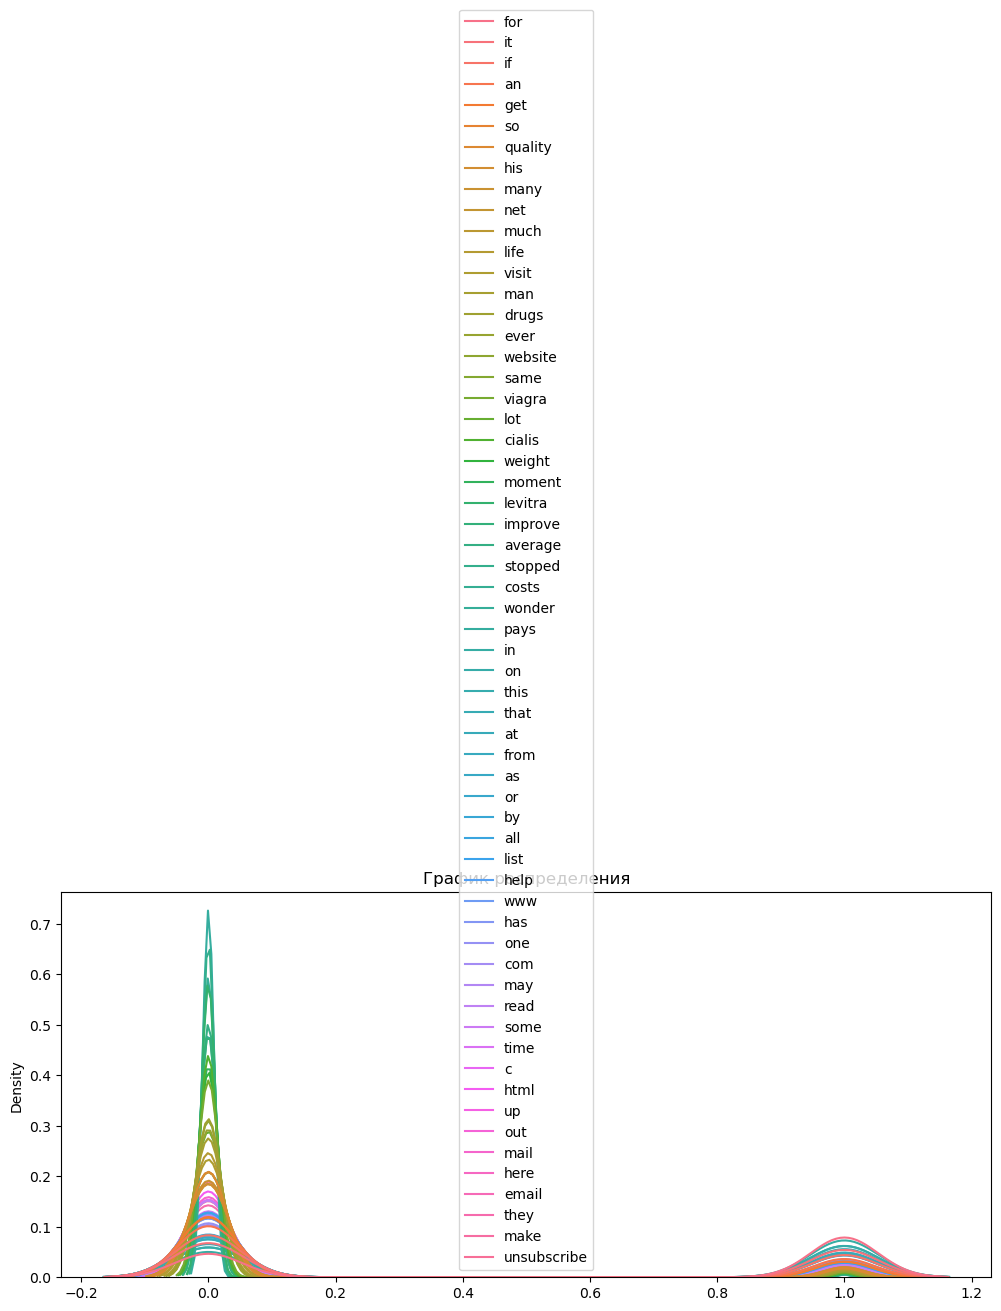

In [49]:
# Проверка на нормальное распределение данных
fig, (ax) = plt.subplots(ncols=1, figsize=(12, 5))
ax.set_title('График распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(X_train)

In [20]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минизируя logloss
log_reg.fit(X_train, y_train)

#Делаем предсказание тренировочной выборки 
y_pred_train = log_reg.predict(X_train)
#Делаем предсказание трестовой выборки 
y_pred_test = log_reg.predict(X_test)
#Рассчитываем F1-меру
print('F1 score train: {:.2f}'.format(metrics.f1_score(y_train, y_pred_train)))
#Рассчитываем F1-меру
print('F1 score test: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test)))

F1 score train: 0.80
F1 score test: 0.80


In [23]:
# Модель на основе алгоритма случайный лес
#Создаём объект класса RandomForestClassifier
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=300, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=6, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X_train, y_train)
 
#Делаем предсказание класса
y_pred = rf_clf_full.predict(X_train)
#Выводим отчёт о метриках
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.63      0.73     29653
           1       0.73      0.90      0.81     32933

    accuracy                           0.77     62586
   macro avg       0.79      0.77      0.77     62586
weighted avg       0.79      0.77      0.77     62586



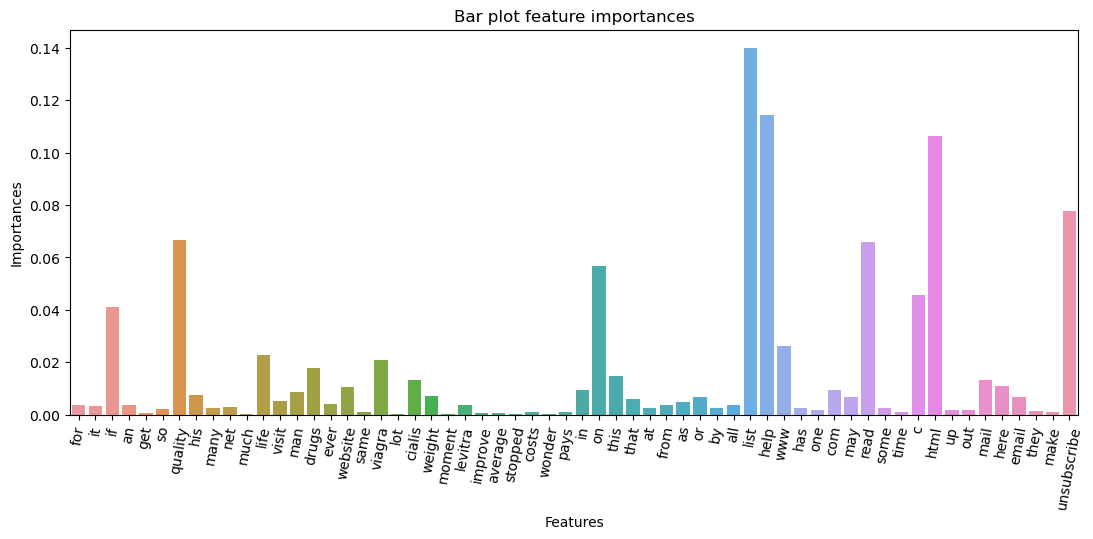

In [30]:
# График влиятельности атрибутов на метрику
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = rf_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
count_barplot = sns.barplot(x=feature, y=feature_importances, ax=ax)
count_barplot.xaxis.set_tick_params(rotation=80) #поворот надписи на оси х
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

#### Второй вариант подхода к задаче на основе nltk метода

In [32]:
fred_df_nltk = pd.read_csv('data/combined_data.csv', sep=',')

In [33]:
fred_df_nltk_c = fred_df_nltk.copy()

In [34]:
# Создание цыфровых атрибутов по содержанию текста в сообщении.
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer()

# Создание цыфрового атрибута по негативному отзыву
sent_analyzer = SentimentIntensityAnalyzer()
neg = []
neu = []
pos = []
compound = []

for x in range(0, fred_df_nltk_c.shape[0]):
    neg_rew = fred_df_nltk_c['text'][x]
    
    sent_a = sent_analyzer.polarity_scores(neg_rew)
    neg.append(list(sent_a.values())[0])
    neu.append(list(sent_a.values())[1])
    pos.append(list(sent_a.values())[2])
    compound.append(list(sent_a.values())[3])
    
fred_df_nltk_c['negativ_rew_neg']=neg
fred_df_nltk_c['negativ_rew_neu']=neu
fred_df_nltk_c['negativ_rew_pos']=pos
fred_df_nltk_c['negativ_rew_compound']=compound

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
fred_df_nltk_c.head(2)

,label,text,negativ_rew_neg,negativ_rew_neu,negativ_rew_pos,negativ_rew_compound
0,1,ounce feather bowl hummingbird opec moment ala...,0.108,0.892,0.000,-0.3182
1,1,wulvob get your medircations online qnb ikud v...,0.049,0.924,0.027,-0.3321


In [37]:
fred_df_nltk_c = fred_df_nltk_c.drop('text', axis=1)

In [ ]:
# Проверка на нормальное распределение данных
fig, (ax) = plt.subplots(ncols=1, figsize=(8, 5))
ax.set_title('График распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(X_train)

In [38]:
# Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 
X = fred_df_nltk_c.drop("label", axis=1)
y = fred_df_nltk_c["label"]

In [39]:
# Выполним разбиение, установив значение параметра `random_state` на 42:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=42
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (62586, 4)
Test shape: (20862, 4)


In [40]:
# Проверим, что число спам и не спам писем примерно одинаково в каждой из выборок:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


1    0.526204
0    0.473796
Name: label, dtype: float64



Test :


1    0.526172
0    0.473828
Name: label, dtype: float64

<AxesSubplot:title={'center':'График распределения'}, ylabel='Density'>

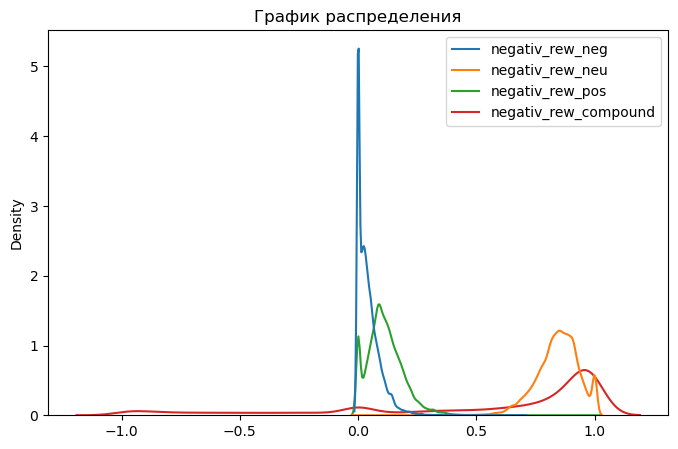

In [41]:
# Проверка на нормальное распределение данных
fig, (ax) = plt.subplots(ncols=1, figsize=(8, 5))
ax.set_title('График распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(X_train)

In [42]:
# Модель на основе алгоритма случайный лес
#Создаём объект класса RandomForestClassifier
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=300, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=6, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X_train, y_train)
 
#Делаем предсказание класса
y_pred = rf_clf_full.predict(X_train)
#Выводим отчёт о метриках
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69     29653
           1       0.72      0.71      0.72     32933

    accuracy                           0.70     62586
   macro avg       0.70      0.70      0.70     62586
weighted avg       0.70      0.70      0.70     62586



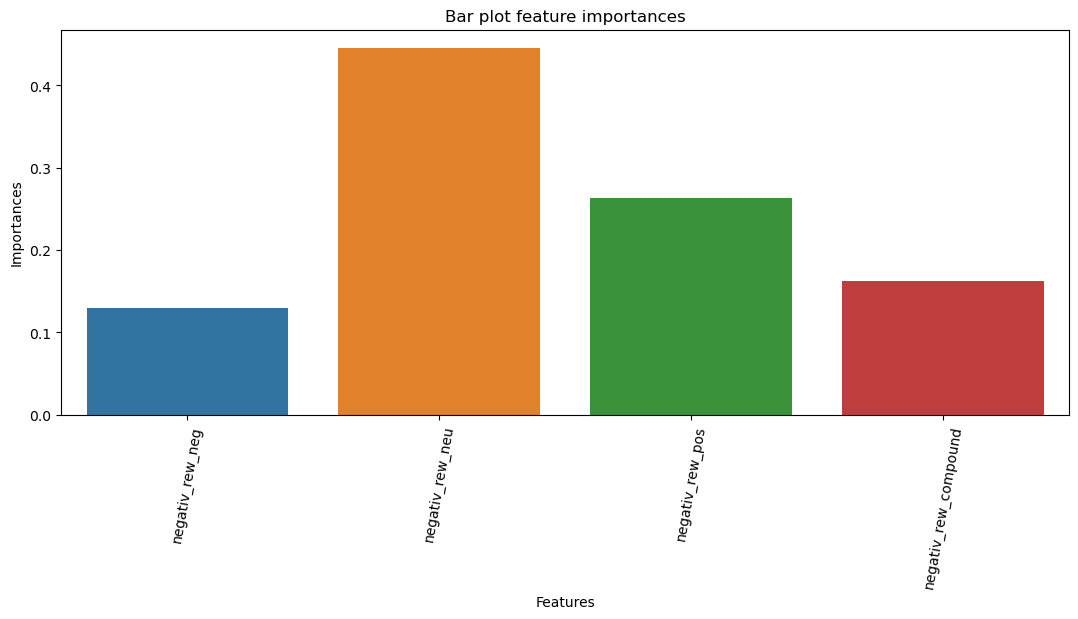

In [43]:
# График влиятельности атрибутов на метрику
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = rf_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
count_barplot = sns.barplot(x=feature, y=feature_importances, ax=ax)
count_barplot.xaxis.set_tick_params(rotation=80) #поворот надписи на оси х
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

### <center>Вывод

1. Первый метод, основанный на выборке уникальных слов используемых в сообщениях как на модели линейной регрессии так и на модели случайного леса показывает чуть лучший результат. Хотя определение письма как спа и не спам относится к задаче классификации, это задачи именно для модели случайный лес.
Этот метод имеет запас на увеличение метрик путём увеличения слов вводимых в итоговый DataFrame, но есть большая вероятность получить переобученную модель.
2. Второй метод, основанный на нейролигвистическом анализе текста nltk короче по содержанию кода и самого конечного DF. Результаты метрикипрактически одинаковые.
    * плюсы: меньше вероятность переобучения.